<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter02/Chapter_2_End_To_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cek versi Python dan library utama
import sys
import sklearn
import numpy as np
import os
from sklearn.model_selection import train_test_split

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setting ukuran label plot
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Path direktori gambar jika ingin menyimpan visualisasi
ROOT_DIR = "."
CHAPTER_TAG = "housing_project"
FIGURE_DIR = os.path.join(ROOT_DIR, "images", CHAPTER_TAG)
os.makedirs(FIGURE_DIR, exist_ok=True)

def simpan_gambar(nama_file, tight=True, ext="png", dpi=300):
    path = os.path.join(FIGURE_DIR, f"{nama_file}.{ext}")
    print("📷 Menyimpan gambar:", path)
    if tight:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)


In [2]:
import tarfile
import urllib.request

# Path dataset custom dari repo GitHub kamu
DATASET_URL = "https://github.com/zahranicp/hands-on-ML2/raw/main/chapter02/housing.tgz"

DATASET_DIR = os.path.join("datasets", "perumahan")

def unduh_dataset(url=DATASET_URL, folder=DATASET_DIR):
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, "housing.tgz")
    print("⬇️ Mengunduh dataset dari:", url)
    urllib.request.urlretrieve(url, file_path)

    # Ekstrak file TGZ
    with tarfile.open(file_path) as tar:
        tar.extractall(path=folder)
    print("✅ Dataset telah diekstrak ke:", folder)

# Jalankan untuk download dan ekstrak
unduh_dataset()


⬇️ Mengunduh dataset dari: https://github.com/zahranicp/hands-on-ML2/raw/main/chapter02/housing.tgz
✅ Dataset telah diekstrak ke: datasets/perumahan


/tmp/ipython-input-3647102894.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)


In [3]:
import pandas as pd

def muat_dataset(path=DATASET_DIR):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

# Muat data ke dalam DataFrame
data_perumahan = muat_dataset()


In [4]:
# Tampilkan 5 baris pertama
data_perumahan.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Tampilkan tipe data, missing values, dll.
data_perumahan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Lihat distribusi nilai pada fitur kategorikal
data_perumahan["ocean_proximity"].value_counts()


,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
# Statistik deskriptif seperti mean, std, min, max
data_perumahan.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


📷 Menyimpan gambar: ./images/housing_project/histogram_fitur.png


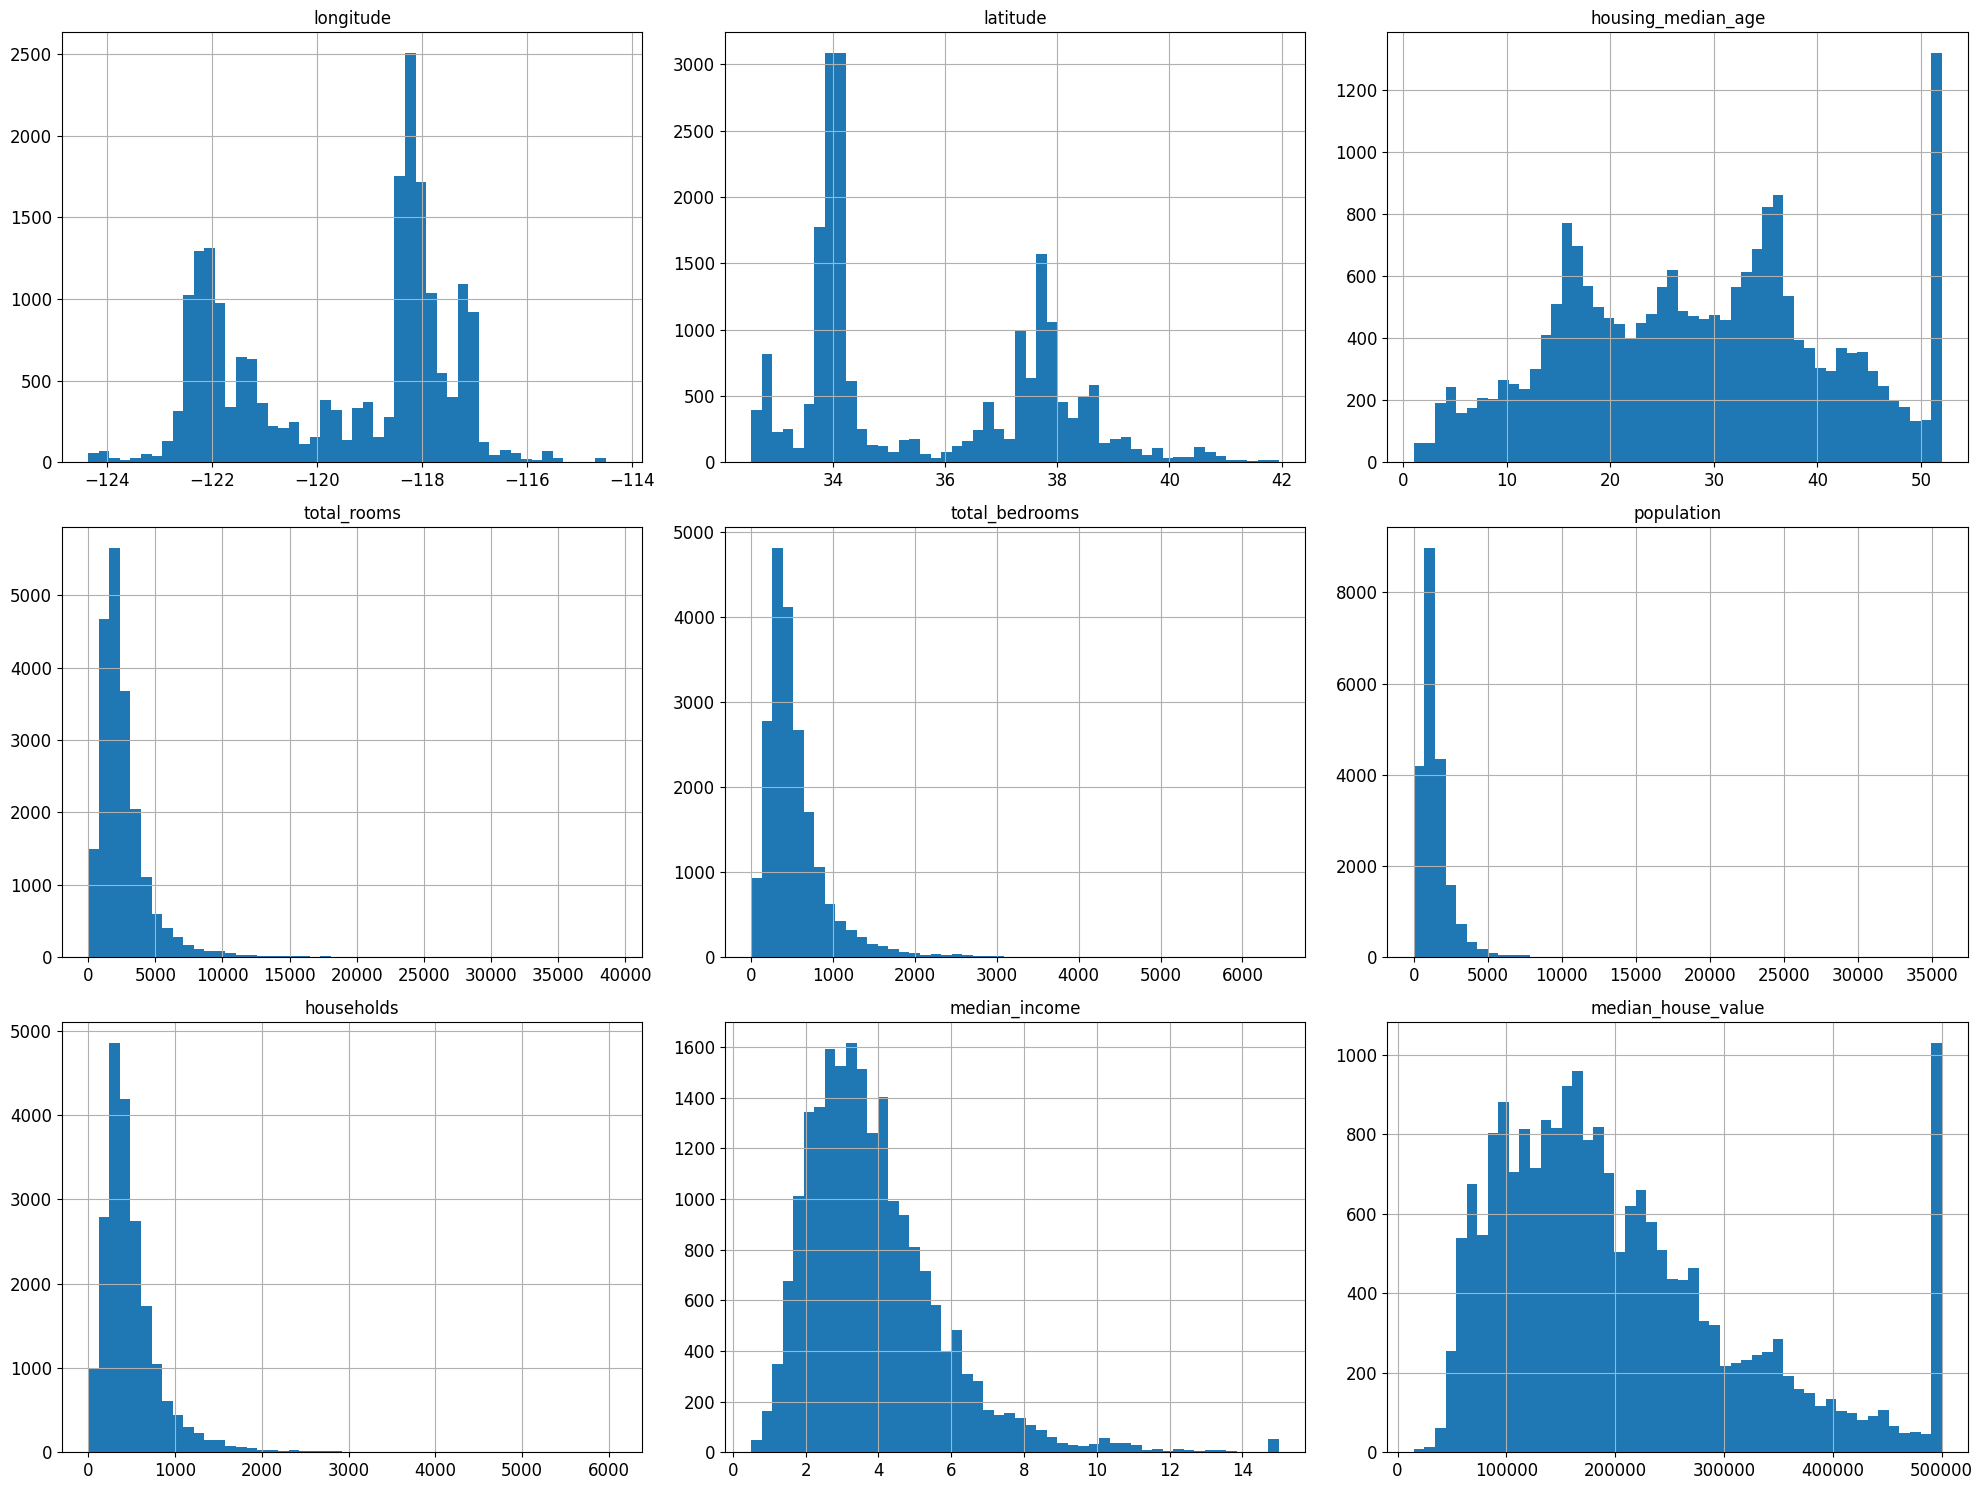

In [8]:
# Visualisasi distribusi setiap fitur numerik
data_perumahan.hist(bins=50, figsize=(20, 15))
simpan_gambar("histogram_fitur")
plt.show()


In [9]:
# Fungsi untuk membagi data secara acak (belum stabil untuk versi data berbeda)
def bagi_train_test(data, rasio_test):
    total = len(data)
    shuffled_index = np.random.permutation(total)
    ukuran_test = int(total * rasio_test)
    index_test = shuffled_index[:ukuran_test]
    index_train = shuffled_index[ukuran_test:]
    return data.iloc[index_train], data.iloc[index_test]

# Contoh penggunaan:
train_data, test_data = bagi_train_test(data_perumahan, 0.2)
print(f"Ukuran train set: {len(train_data)}, test set: {len(test_data)}")


Ukuran train set: 16512, test set: 4128


In [10]:
# Gunakan hashing CRC32 pada ID untuk memastikan stabilitas
from zlib import crc32

def cek_test_set(id_value, rasio_test):
    return crc32(np.int64(id_value)) & 0xffffffff < rasio_test * 2**32

def split_dg_id_stabil(data, rasio_test, kolom_id):
    id_data = data[kolom_id]
    kondisi_test = id_data.apply(lambda val: cek_test_set(val, rasio_test))
    return data.loc[~kondisi_test], data.loc[kondisi_test]


In [11]:
# Jika belum ada kolom ID, gunakan index sebagai ID
data_dg_index = data_perumahan.reset_index()  # menambahkan kolom 'index'
data_latlon_id = data_perumahan.copy()
data_latlon_id["id"] = (data_latlon_id["longitude"] * 1000 + data_latlon_id["latitude"]).astype(np.int64)

# Split dengan ID berdasarkan kombinasi latitude + longitude
train_set, test_set = split_dg_id_stabil(data_latlon_id, 0.2, "id")

# Verifikasi ukuran
print(f"Ukuran training: {len(train_set)}, testing: {len(test_set)}")


Ukuran training: 16322, testing: 4318


In [12]:
# Tambahkan kolom kategori pendapatan (income_cat)
data_perumahan["kategori_pendapatan"] = pd.cut(
    data_perumahan["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Lihat distribusi income category
data_perumahan["kategori_pendapatan"].value_counts().sort_index()


,count
kategori_pendapatan,
1,822
2,6581
3,7236
4,3639
5,2362


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for indeks_latih, indeks_uji in splitter.split(data_perumahan, data_perumahan["kategori_pendapatan"]):
    strat_train = data_perumahan.loc[indeks_latih]
    strat_test = data_perumahan.loc[indeks_uji]

# Cek distribusi kategori di strat_test
strat_test["kategori_pendapatan"].value_counts(normalize=True)


,proportion
kategori_pendapatan,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [14]:
# Bersihkan kolom sementara
for dataset in (strat_train, strat_test):
    dataset.drop("kategori_pendapatan", axis=1, inplace=True)

# Simpan set akhir
data_latih = strat_train.copy()
data_uji = strat_test.copy()


In [16]:
# gunakan salinan dari training set agar tidak merusak data asli
data_latih_explore = data_latih.copy()


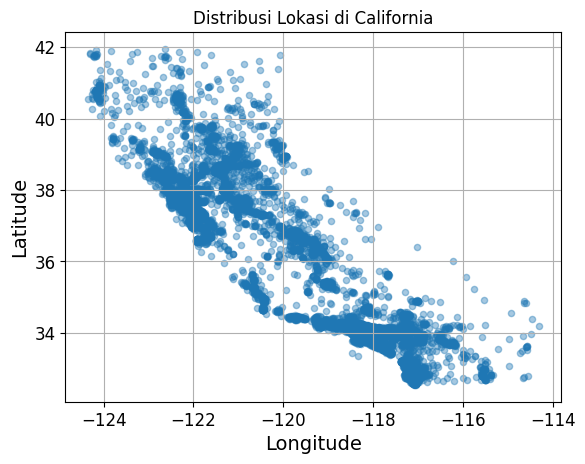

In [17]:
# Scatter plot lokasi berdasarkan koordinat
data_latih_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.title("Distribusi Lokasi di California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


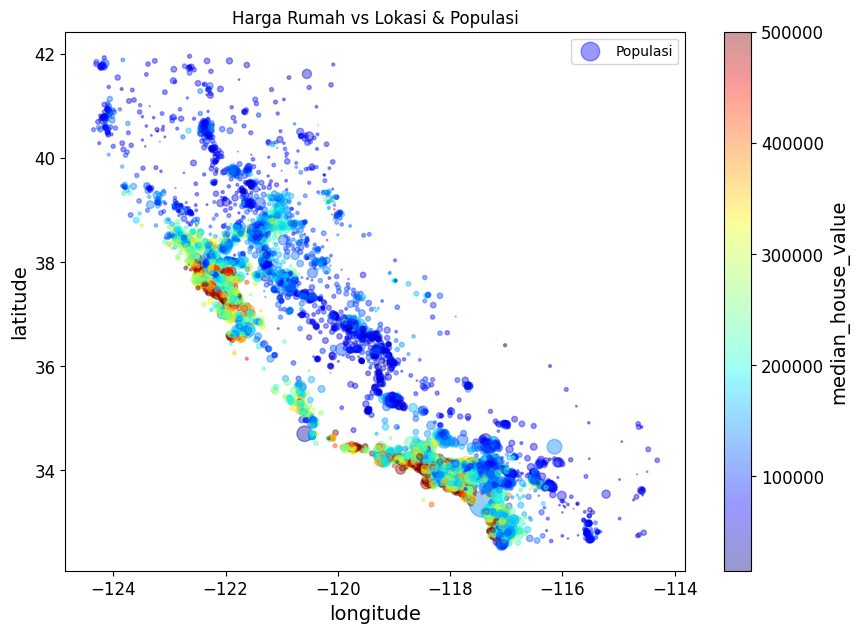

In [18]:
data_latih_explore.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=data_latih_explore["population"] / 100,  # ukuran titik = jumlah penduduk
    label="Populasi",
    c="median_house_value",  # warna = harga rumah
    cmap="jet",
    figsize=(10, 7),
    colorbar=True,
)
plt.legend()
plt.title("Harga Rumah vs Lokasi & Populasi")
plt.show()


In [19]:
# Hanya ambil kolom numerik
data_numerik = data_latih_explore.select_dtypes(include=[np.number])

# Hitung korelasi
korelasi = data_numerik.corr()

# Urutkan korelasi terhadap median_house_value
korelasi["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


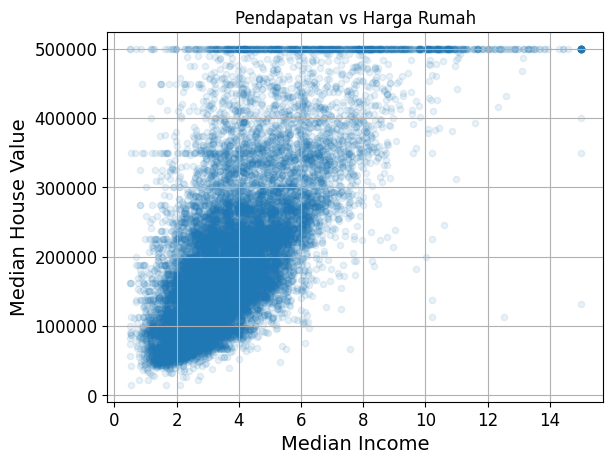

In [20]:
data_latih_explore.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
)
plt.title("Pendapatan vs Harga Rumah")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()


In [21]:
data_latih_explore["rooms_per_household"] = data_latih_explore["total_rooms"] / data_latih_explore["households"]
data_latih_explore["bedrooms_per_room"] = data_latih_explore["total_bedrooms"] / data_latih_explore["total_rooms"]
data_latih_explore["population_per_household"] = data_latih_explore["population"] / data_latih_explore["households"]

data_latih_explore[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()


,rooms_per_household,bedrooms_per_room,population_per_household
12655,5.485836,0.205784,3.168555
15502,6.927083,0.160714,2.623698
2908,5.393333,0.191595,2.223333
14053,3.886128,0.276505,1.859213
20496,6.096552,0.182692,3.167241


In [22]:
# Ambil hanya kolom numerik sebelum hitung korelasi
data_numerik = data_latih_explore.select_dtypes(include=[np.number])

# Korelasi terhadap target
data_numerik.corr()["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


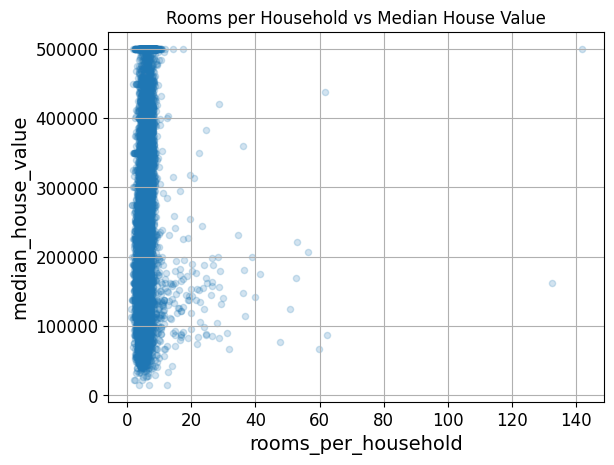

In [23]:
data_latih_explore.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.title("Rooms per Household vs Median House Value")
plt.grid(True)
plt.show()


In [24]:
# Pisahkan label (target prediksi)
fitur_latih = data_latih.drop("median_house_value", axis=1)
label_latih = data_latih["median_house_value"].copy()


In [25]:
from sklearn.impute import SimpleImputer

# Ambil hanya fitur numerik untuk imputasi
fitur_numerik = fitur_latih.select_dtypes(include=[np.number])

# Siapkan imputernya
imputer = SimpleImputer(strategy="median")
imputer.fit(fitur_numerik)


SimpleImputer(strategy='median')

In [26]:
# Tampilkan median yang dipakai untuk imputasi
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [27]:
# Terapkan transformasi ke data
fitur_numerik_tr = imputer.transform(fitur_numerik)

# Konversi kembali ke DataFrame agar mudah dibaca
fitur_numerik_tr = pd.DataFrame(fitur_numerik_tr, columns=fitur_numerik.columns, index=fitur_numerik.index)

fitur_numerik_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Ambil kolom kategorikal
fitur_kategorikal = fitur_latih[["ocean_proximity"]]

# Encoder kategorikal
encoder = OneHotEncoder()
fitur_kat_1hot = encoder.fit_transform(fitur_kategorikal)

# Tampilkan hasil encoding (sparse matrix)
fitur_kat_1hot


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# Index kolom yang dibutuhkan
kolom_total = ["total_rooms", "total_bedrooms", "population", "households"]
ix_total, ix_bed, ix_pop, ix_hh = [fitur_numerik.columns.get_loc(c) for c in kolom_total]

# Transformer untuk menambahkan fitur kombinasi
class KombinasiAtribut(BaseEstimator, TransformerMixin):
    def __init__(self, tambah_bedrooms_per_room=True):
        self.tambah_bedrooms_per_room = tambah_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, ix_total] / X[:, ix_hh]
        population_per_household = X[:, ix_pop] / X[:, ix_hh]
        if self.tambah_bedrooms_per_room:
            bedrooms_per_room = X[:, ix_bed] / X[:, ix_total]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline untuk data numerik
pipeline_numerik = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("kombinasi", KombinasiAtribut()),
    ("scaler", StandardScaler())
])


In [32]:
from sklearn.compose import ColumnTransformer

# Kolom numerik & kategorikal
atribut_numerik = list(fitur_numerik.columns)
atribut_kategorikal = ["ocean_proximity"]

# Pipeline gabungan
pipeline_lengkap = ColumnTransformer([
    ("num", pipeline_numerik, atribut_numerik),
    ("cat", OneHotEncoder(), atribut_kategorikal)
])


In [33]:
fitur_latih_siap = pipeline_lengkap.fit_transform(fitur_latih)
fitur_latih_siap.shape


(16512, 16)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Buat dan latih model
model_linear = LinearRegression()
model_linear.fit(fitur_latih_siap, label_latih)

# Prediksi di training set
pred_linear = model_linear.predict(fitur_latih_siap)

# Hitung RMSE
mse_linear = mean_squared_error(label_latih, pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("RMSE Linear Regression:", rmse_linear)


RMSE Linear Regression: 68627.87390018745


In [35]:
from sklearn.tree import DecisionTreeRegressor

# Model dan training
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(fitur_latih_siap, label_latih)

# Prediksi dan evaluasi
pred_tree = model_tree.predict(fitur_latih_siap)
rmse_tree = np.sqrt(mean_squared_error(label_latih, pred_tree))
print("RMSE Decision Tree:", rmse_tree)


RMSE Decision Tree: 0.0


In [36]:
from sklearn.model_selection import cross_val_score

# CV untuk Decision Tree
scores_tree = cross_val_score(model_tree, fitur_latih_siap, label_latih,
                              scoring="neg_mean_squared_error", cv=10)
rmse_tree_cv = np.sqrt(-scores_tree)

print("Decision Tree CV Scores:", rmse_tree_cv)
print("Mean:", rmse_tree_cv.mean())
print("Std Dev:", rmse_tree_cv.std())


Decision Tree CV Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Std Dev: 2914.035468468928


In [37]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(fitur_latih_siap, label_latih)

# Evaluasi di training set
pred_forest = model_forest.predict(fitur_latih_siap)
rmse_forest = np.sqrt(mean_squared_error(label_latih, pred_forest))
print("RMSE Random Forest (Training):", rmse_forest)


RMSE Random Forest (Training): 18650.698705770003


In [38]:
scores_forest = cross_val_score(model_forest, fitur_latih_siap, label_latih,
                                scoring="neg_mean_squared_error", cv=10)
rmse_forest_cv = np.sqrt(-scores_forest)

print("Random Forest CV Scores:", rmse_forest_cv)
print("Mean:", rmse_forest_cv.mean())
print("Std Dev:", rmse_forest_cv.std())


Random Forest CV Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Std Dev: 2203.3381412764606


---

# End-to-End ML Project — Analisis Teoretikal (Chapter 2)

## Tujuan Proyek

Tujuan utama dari proyek ini adalah untuk **memprediksi harga rumah median (median\_house\_value)** di distrik-distrik di California, berdasarkan fitur-fitur seperti:

* Lokasi geografis (`longitude`, `latitude`),
* Karakteristik rumah (`total_rooms`, `housing_median_age`),
* Demografi (`median_income`, `population`, dll).

---

## 1. Persiapan & Pengambilan Data

**Langkah-langkah:**

* Dataset diunduh dari GitHub pribadi.
* File `.tgz` diekstrak lalu dimuat sebagai DataFrame.
* Melihat struktur data, distribusi, dan nilai unik.

**Analisis:**

* Ditemukan fitur kategorikal `ocean_proximity` dan banyak fitur numerik.
* Fitur `median_income` terlihat memiliki pengaruh besar terhadap harga rumah → jadi kandidat kuat sebagai prediktor.
* Fitur `total_bedrooms` memiliki missing values → harus ditangani.

---

## 2. Pembuatan Test Set & Stratified Sampling

**Langkah-langkah:**

* Membuat test set stabil berdasarkan kombinasi `latitude` dan `longitude` untuk menghindari data leakage.
* Membuat stratifikasi berdasarkan kategori `median_income`.
* Dibandingkan proporsi kategori: random split vs stratified split.

**Output Utama:**

| Kategori Pendapatan | Random Error (%) | Stratified Error (%) |
| ------------------- | ---------------- | -------------------- |
| 3 (Tinggi)          | +2.27%           | –0.01%               |
| 1 (Rendah)          | +0.97%           | +0.36%               |
| 4–5 (Menengah-atas) | –4% s.d. –5%     | < ±0.1%              |

**Analisis:**

* Stratified sampling berhasil menjaga representasi data dengan sangat baik.
* Random sampling memperbesar error dan berisiko membuat model bias.

---

## 3. Eksplorasi & Visualisasi Data

**Langkah-langkah:**

* Visualisasi scatter plot lokasi rumah dan harga.
* Plot korelasi antar fitur.
* Scatter `median_income` vs `median_house_value`.

**Insight Visual:**

* Harga rumah tinggi terkonsentrasi di dekat laut (pantai barat).
* Terdapat cutoff harga di 500.000 → kemungkinan karena batas dataset (label capped).
* Korelasi tertinggi:

  * `median_income` (positif kuat),
  * `rooms_per_household` (positif),
  * `bedrooms_per_room` (negatif).

**Analisis:**

* `median_income` adalah fitur prediktif paling kuat.
* Beberapa fitur buatan seperti `rooms_per_household` sangat menjanjikan.
* Korelasi kuat → bisa dimanfaatkan oleh model linear dan pohon keputusan.

---

## 4. Persiapan Data untuk ML

**Langkah-langkah:**

* Imputasi nilai hilang pada `total_bedrooms` menggunakan median.
* One-hot encoding untuk `ocean_proximity`.
* Pembuatan fitur kombinasi (feature engineering).
* Normalisasi fitur numerik dengan `StandardScaler`.
* Gabung semua preprocessing ke dalam `ColumnTransformer`.

**Analisis:**

* Pipeline modular dan fleksibel, cocok untuk deployment ke production.
* Proses transformasi tidak hanya membersihkan data, tapi juga memperkaya dengan informasi tambahan.
* Meningkatkan kualitas input model → kunci performa ML.

---

## 5. Pelatihan Model & Evaluasi Awal

### Linear Regression

**RMSE:** \~68.628

📘 *Analisis*:

* Model terlalu sederhana.
* Tidak mampu menangkap non-linearitas kompleks antara fitur dan harga rumah.
* RMSE cukup tinggi → prediksi meleset jauh dari harga aktual.

---

### Decision Tree

**RMSE (training):** 0.0
**RMSE (cross-validation):** Mean \~71.630, Std \~2.914

📘 *Analisis*:

* RMSE training = 0 → model overfitting (hafal data latih).
* CV menunjukkan error besar → generalisasi buruk.
* Tidak direkomendasikan sebagai model akhir.

---

### Random Forest

**RMSE (training):** \~18.650
**RMSE (cross-validation):** Mean \~50.436, Std \~2.203

📘 *Analisis*:

* Performa jauh lebih baik dibanding dua model sebelumnya.
* Mampu menangkap hubungan non-linear.
* Cukup stabil (std kecil) → hasil generalisasi kuat.
* Kandidat kuat untuk model akhir dan dilanjutkan ke fine-tuning.

---

## Rangkuman Akhir

| Model             | RMSE (Train) | RMSE (CV) | Overfit?   | Cocok untuk Production? |
| ----------------- | ------------ | --------- | ---------- | ----------------------- |
| Linear Regression | \~68.6k      | \~68.6k   |  Tidak    | Tidak akurat         |
| Decision Tree     | 0.0          | \~71.6k   | Iya      | Tidak stabil          |
| Random Forest     | \~18.6k      | \~50.4k   | Sedikit | Ya                    |

---

## Kesimpulan Proyek

* Tahapan E2E ML telah berhasil direplikasi dari awal hingga akhir.
* **Random Forest** adalah model terbaik sejauh ini berdasarkan CV RMSE.
* Pipeline dan struktur data sudah siap untuk:

  * Fine-tuning hyperparameter (GridSearchCV),
  * Evaluasi pada test set akhir,
  * Deploy model ke sistem produksi atau Streamlit app.

---